In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap, cm
from netCDF4 import Dataset as NetCDFFile

In [2]:
# import data directly from myria

fileURL = 'https://rest.myria.cs.washington.edu:1776/dataset/user-armbrustlab/program-seaflow/relation-div_phyto_TS/data?format=csv'
result = pd.read_csv(fileURL)
print(result.columns)

Index([u'N0', u'H', u'J', u'T', u'S', u'LON', u'LAT', u'Cruise'], dtype='object')


In [3]:
# pick which variable to plot

value = 'N0'
x = (result['LON']).values # longitude
y = (result['LAT']).values # latitude
z = (result[value]).values # bead attribute

# convert all longitude to longitude east
x[x<0]= 360+x[x<0];

xew = x
xew[xew>180] = xew[xew>180]-360

result['LON'] = xew

print(max(x))

179.992


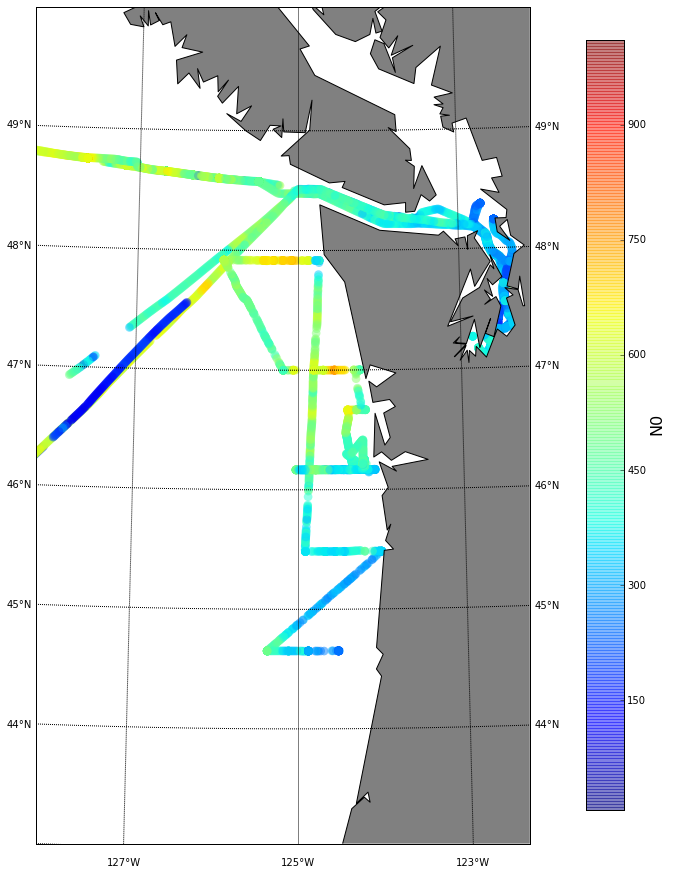

In [4]:
fig1 = plt.figure(1, figsize=(20,15))

m = Basemap(llcrnrlon=-128.,llcrnrlat=43.,urcrnrlon=-122.,urcrnrlat=50.,
            projection='lcc',lat_1=44.,lat_2=46.,lon_0=-125.,
            resolution ='l',area_thresh=1000.)
#m = Basemap(width=12000000,height=9000000,projection='lcc',
#            resolution='c',lat_1=40.,lat_2=50,lat_0=45,lon_0=-140.)
m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='grey',lake_color='white')
#plt.axes([0.025, 0.025, 0.95, 0.95])
xm, ym = m(xew,y)
m.scatter(xm, ym, s=75, c=z, alpha=.5,lw=0)

m.drawparallels(np.arange(43,50,1),labels=[1,1,0,1])
m.drawmeridians(np.arange(-155,-122,2),labels=[1,1,0,1])

cb = plt.colorbar(shrink=.92)
cb.set_label(label=value,fontsize=16)

plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()

In [5]:
# find the cruises that have data in this region

subset = result[(result['LON']>-128) & (result['LON']<-122) & (result['LAT']>47) & (result['LAT']<50)]

print(pd.unique(subset['Cruise']))

['Thompson_10' 'Thompson_0' 'Thompson_8' 'Thompson_9' 'Thompson_12'
 'Thompson_4' 'CMOP_3']


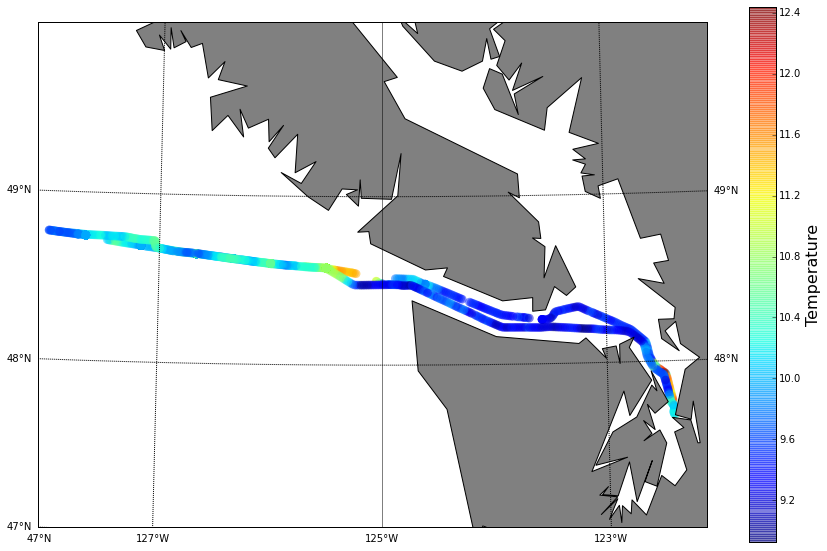

In [12]:
# plot just one cruise at a time
cruise = 'Thompson_10'
onec = (subset[(subset['Cruise']==cruise)]) # bead attribute

x = (onec['LON']).values # longitude
y = (onec['LAT']).values # latitude
z = (onec[value]).values # bead attribute

xew = x
xew[xew>180] = xew[xew>180]-360

fig2 = plt.figure(2, figsize=(15,12))

m = Basemap(llcrnrlon=-128.,llcrnrlat=47.,urcrnrlon=-122.,urcrnrlat=50.,
            projection='lcc',lat_1=44.,lat_2=46.,lon_0=-125.,
            resolution ='l',area_thresh=1000.)
#m = Basemap(width=12000000,height=9000000,projection='lcc',
#            resolution='c',lat_1=40.,lat_2=50,lat_0=45,lon_0=-140.)
m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='grey',lake_color='white')
#plt.axes([0.025, 0.025, 0.95, 0.95])
xm, ym = m(xew,y)
m.scatter(xm, ym, s=75, c=onec['T'], alpha=.5,lw=0)

m.drawparallels(np.arange(43,50,1),labels=[1,1,0,1])
m.drawmeridians(np.arange(-155,-122,2),labels=[1,1,0,1])

cb = plt.colorbar(shrink=.8)
cb.set_label(label='Temperature',fontsize=16)

plt.tick_params(axis='both', which='major', labelsize=18)

plt.show()

Concentrate on Thompson_10 and Thompson_12 as they have the best coverage out of the Sound and across the shelf.